In [108]:
# pandas 이용
import pandas as pd
import warnings

# 경고문 삭제
warnings.filterwarnings('ignore')

# 미국, 유럽연합, 일본 심볼
code_in = int(input("통화 유형 선택(1:USD, 2:EUR, 3:JPY): "))

if code_in < 1 or code_in > 3:
        print("잘못된 값을 입력하였습니다.")

currency_symbols = ['USD', 'EUR', 'JPY']
currency_name = ['미국 달러', '유럽연합 유로', '일본 엔']
code = currency_symbols[code_in - 1]

df = pd.DataFrame()
for page_num in range(1, 11):
    base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}KRW&page={page_num}"
    temp = pd.read_html(base_url, encoding="cp949", header=1)

    # concat을 이용해 데이터 합치기
    df = pd.concat([df, temp[0]])

# 데이터 표시
print(f"=== {currency_name[code_in - 1]} - {code} ===")
print(df)

=== 미국 달러 - USD ===
            날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
0   2024.06.27  1386.5   8.0  1410.76  1362.24  1400.0  1373.0
1   2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
2   2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
3   2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
4   2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4
..         ...     ...   ...      ...      ...     ...     ...
5   2024.02.05  1335.5   3.0  1358.87  1312.13  1348.5  1322.5
6   2024.02.02  1338.5   7.5  1361.92  1315.08  1351.6  1325.4
7   2024.02.01  1331.0   4.0  1354.29  1307.71  1344.0  1318.0
8   2024.01.31  1335.0   4.0  1358.36  1311.64  1348.0  1322.0
9   2024.01.30  1331.0   3.5  1354.29  1307.71  1344.0  1318.0

[100 rows x 7 columns]


In [109]:
# 원하는 열만 출력

df_totla = df[['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]

In [110]:
df_totla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      100 non-null    object 
 1   매매기준율   100 non-null    float64
 2   사실 때    100 non-null    float64
 3   파실 때    100 non-null    float64
 4   보내실 때   100 non-null    float64
 5   받으실 때   100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB


In [111]:
df_totla_chart = df_totla.copy()
# index 값으로 날짜를 넣어준다.
df_totla_chart = df_totla_chart.set_index('날짜')
# [::-1]을 넣어줌으로서 역순으로 변경
df_totla_chart = df_totla_chart[::-1]
df_totla_chart

,매매기준율,사실 때,파실 때,보내실 때,받으실 때
날짜,,,,,
2024.01.30,1331.0,1354.29,1307.71,1344.0,1318.0
2024.01.31,1335.0,1358.36,1311.64,1348.0,1322.0
2024.02.01,1331.0,1354.29,1307.71,1344.0,1318.0
2024.02.02,1338.5,1361.92,1315.08,1351.6,1325.4
2024.02.05,1335.5,1358.87,1312.13,1348.5,1322.5
...,...,...,...,...,...
2024.06.21,1391.0,1415.34,1366.66,1404.6,1377.4
2024.06.24,1388.0,1412.29,1363.71,1401.6,1374.4
2024.06.25,1392.0,1416.36,1367.64,1405.6,1378.4


In [112]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': 'exchange rate'}, xlabel='날짜'>

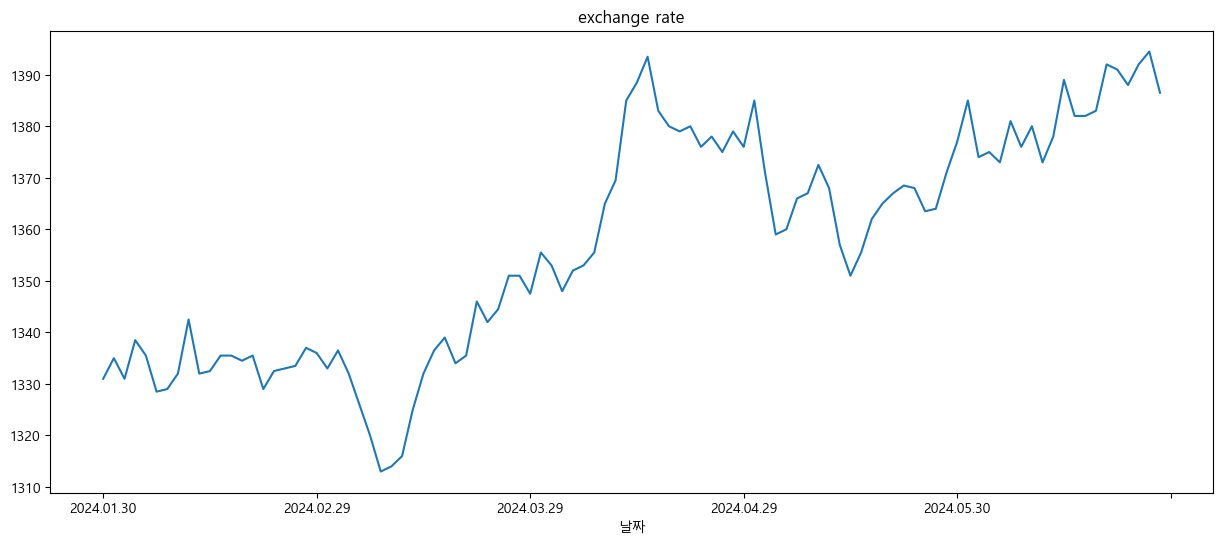

In [113]:
# 매매기준율을 값으로 잡고 그래프를 생성
df_totla_chart['매매기준율'].plot(figsize=(15, 6), title = 'exchange rate')

### 월 별 검색

In [114]:
# 날짜 컬럼의 형 변환(문자열 -> 날짜)
df_totla['날짜'] = df_totla['날짜'].str.replace(".", "").astype('datetime64[ms]') # str을 안 붙이면 하나만 일 때이다. str을 붙여야 전부 다 바뀐다.
df_totla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [115]:
# 월 컬럼 생성

df_totla['월'] = df_totla['날짜'].dt.month

In [116]:
month_in = int(input("검색할 월 입력: "))

#drop=True를 붙여야지만 인덱스를 리셋 시키면서 새로 생성하지 않음
month_df = df_totla.loc[df_totla['월'] == month_in, ['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']][::-1].reset_index(drop=True)

<Axes: title={'center': 'exchange rate'}, xlabel='날짜'>

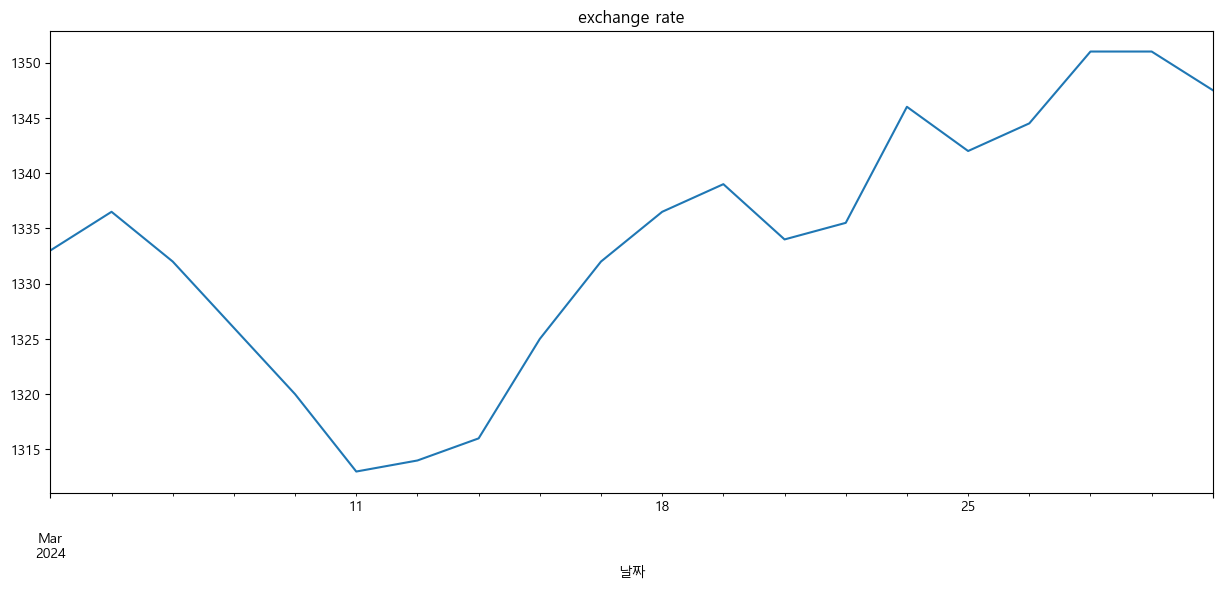

In [117]:
month_df_chart = month_df.copy()
month_df_chart = month_df_chart.set_index('날짜')
month_df_chart['매매기준율'].plot(figsize=(15, 6), title = 'exchange rate')